In [4]:
# Using captia_income data set, build a regression model and predict the per capitia income for Canadian citizens in year 2021.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data set
dataset=pd.read_csv('../Data/captia_income.csv')


# To create feature matrix and dependent variable vector
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Dependent variable vector using label encoder
le=LabelEncoder()
y=np.array(le.fit_transform(y))

# Splitting of data into training data set and testing data set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)  


# Feature scaling 
sc=StandardScaler()
xtrain[:]=sc.fit_transform(xtrain[:])
xtest[:]=sc.fit_transform(xtest[:])

# Build a multiple linear model
regn=LinearRegression()
regn.fit(xtrain,ytrain)
yestimated=regn.predict(xtest)

# Find the predicted per capita income for year 2021 
predicted_val = regn.predict([[2021]])
print(predicted_val)




[38008.18367347]


Estimated coefficients:
b_0 = -1632210.757855453            
b_1 = 828.4650752227082
42117.15916964016


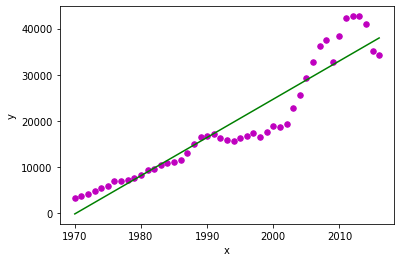

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data set
dataset=pd.read_csv('../Data/captia_income.csv')


# To create feature matrix and dependent variable vector
x=dataset.iloc[:,:-1].values
x =x.reshape(len(x))
y=dataset.iloc[:,-1].values


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

    
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
print(b[0]+b[1]*2021)
# plotting regression line
plot_regression_line(x, y, b)